<a href="https://colab.research.google.com/github/Thabby07/richter-predictor/blob/master/TFM_Exploraci%C3%B3n_del_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Urls para el dataset
# https://eq2015.npc.gov.np/#/download
# https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

#TODO Para calcular descriptivos. Ver: https://towardsdatascience.com/practical-statistics-visualization-with-python-plotly-770e96e35067

# Contexto

Trataremos de predecir la variable ordinal damage_grade, que representa el nivel de daño a cada edificio tras el terremoto. Tenemos 3 grados:

•	1 representa un daño bajo.

•	2 representa un daño medio.

•	3 representa un daño alto, casi la destrucción del edificio.

## Características

Este conjunto de datos consiste en información de la estructura y propiedad de los edificios. Cada fila representa un edificio y sus características tras el terremoto de Gorkha.

Existen 39 columnas, donde building_id es el identificador único. El resto de variables se describirán a continuación (las variables categóricas han sido sustituidas por letras aleatorias tras la encuesta inicial). 

## Descripción
A continuación, veremos una tabla con la descripción ed cada una de las variables explicativas del dataset, así como el tipo de dato y el rango de valores que toma dentro del conjunto.
 
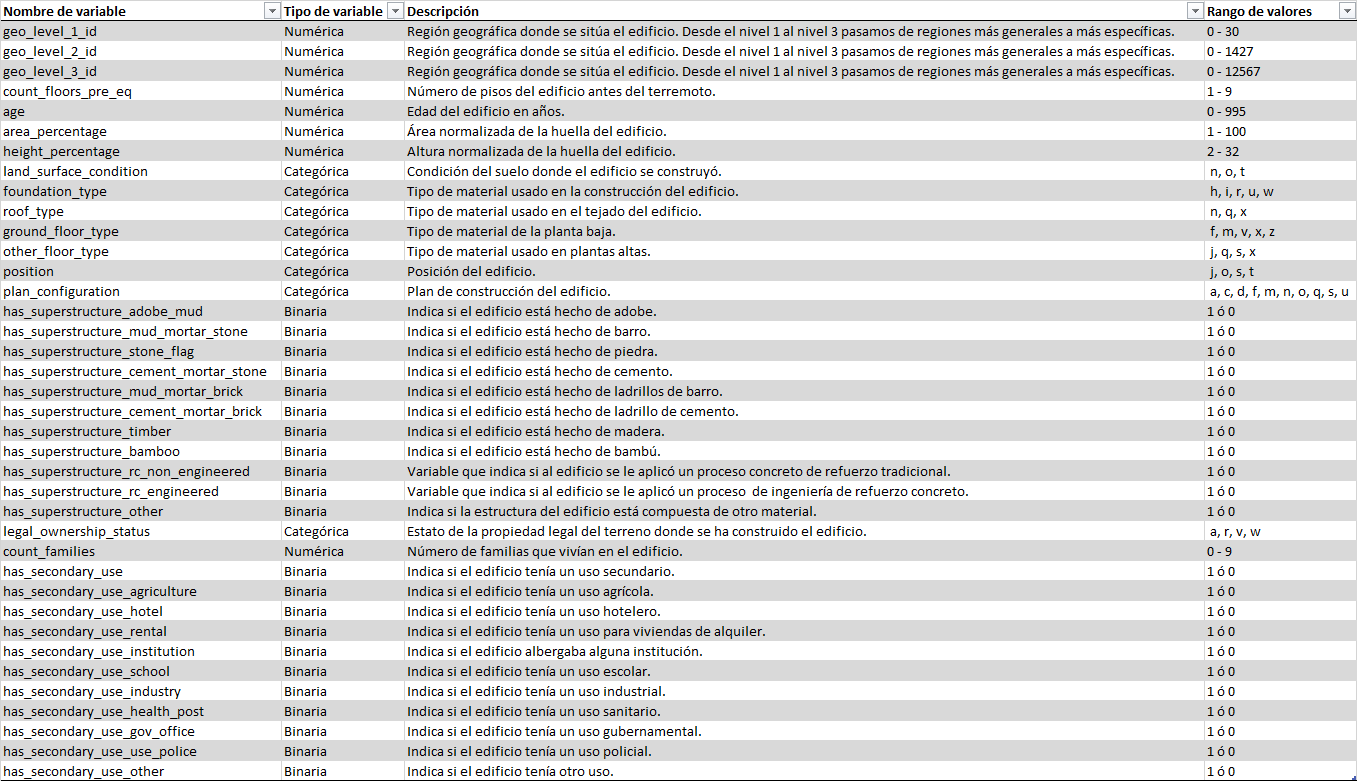


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from datetime import datetime
import pylab as pl

In [0]:
train_values = pd.read_csv('/content/train_values.csv')
train_labels = pd.read_csv('/content/train_labels.csv')
test_values = pd.read_csv('/content/test_values.csv')

In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_values.shape # (260601, 39)


(260601, 39)

In [7]:
train_labels.shape # (260601, 2)


(260601, 2)

In [8]:
test_values.shape # (86868, 39)

(86868, 39)

In [0]:
train = train_values.set_index('building_id').join(train_labels.set_index('building_id'), how='left')

In [10]:
train.shape

(260601, 39)

In [11]:
train.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

# Exploración de variables continuas

In [0]:
continuous_variables = ['age','area_percentage','height_percentage']

### Análisis del histograma
Comparamos cada variable de entrenamiento con la de test


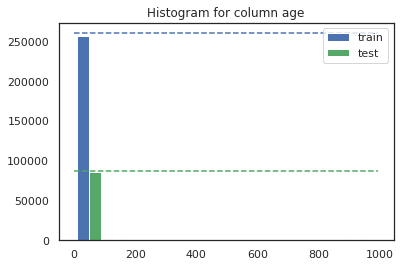

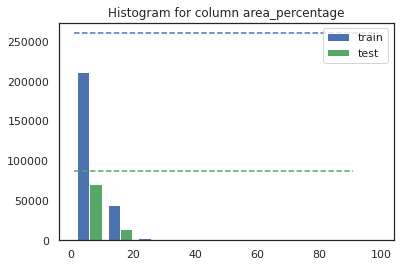

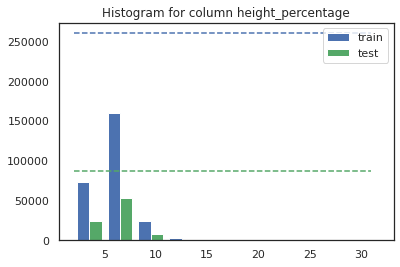

In [93]:
plt.style.use('seaborn-deep')

for col in continuous_variables:
  range_train = range(np.min(train[col]),np.max(train[col]))
  range_test = range(np.min(test_values[col]),np.max(test_values[col]))
  train_limit = np.array([train.shape[0] for i in range_train])
  test_limit = np.array([test_values.shape[0] for i in range_test])
  x = [train[col], test_values[col]]
  plt.hist(x, label=['train', 'test'])
  plt.plot(range_train, train_limit, 'b--')
  plt.plot(range_test, test_limit, 'g--') 
  plt.title("Histogram for column " + col)
  plt.legend(loc='upper right')
  plt.show()

### Análisis de outliers

Veamos diagramas de cajas de las variables numéricas originales (excepto booleanas) primero para el entrenamiento y luego para test.

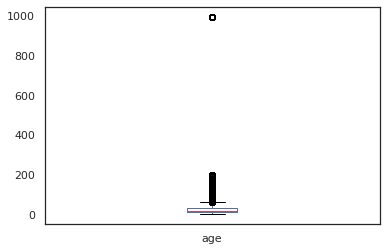

<Figure size 432x288 with 0 Axes>

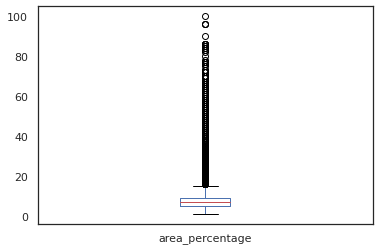

<Figure size 432x288 with 0 Axes>

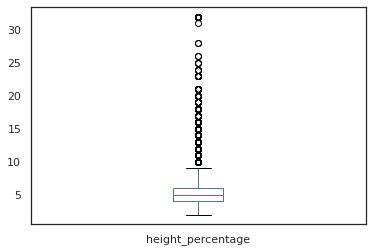

<Figure size 432x288 with 0 Axes>

In [74]:
# Box plot for train
for col in continuous_variables:
  fig = plt.figure()
  train.boxplot(column=col, grid=False)
  plt.show()
  plt.clf()


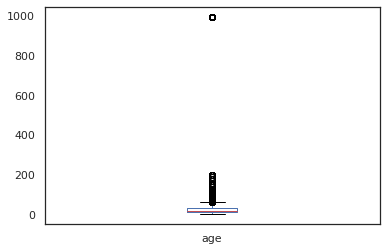

<Figure size 432x288 with 0 Axes>

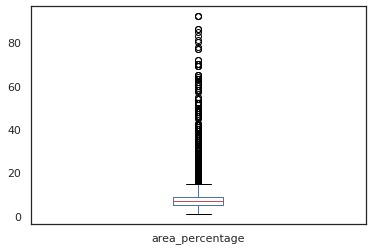

<Figure size 432x288 with 0 Axes>

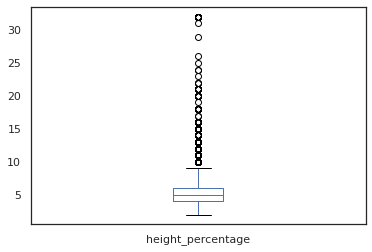

<Figure size 432x288 with 0 Axes>

In [76]:
# Box plot for test
for col in continuous_variables:
  fig = plt.figure()
  test_values.boxplot(column=col, grid=False)
  plt.show()
  plt.clf()


# Exploración de variables discretas

### Análisis del histograma


In [0]:
discrete_variables = ['count_floors_pre_eq']

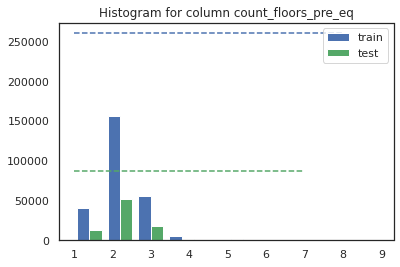

In [92]:
for col in discrete_variables:
  range_train = range(np.min(train[col]),np.max(train[col]))
  range_test = range(np.min(test_values[col]),np.max(test_values[col]))
  train_limit = np.array([train.shape[0] for i in range_train])
  test_limit = np.array([test_values.shape[0] for i in range_test])
  x = [train[col], test_values[col]]
  plt.hist(x, label=['train', 'test'])
  plt.plot(range_train, train_limit, 'b--')
  plt.plot(range_test, test_limit, 'g--') 
  plt.title("Histogram for column " + col)
  plt.legend(loc='upper right')
  plt.show()

### Análisis de outliers

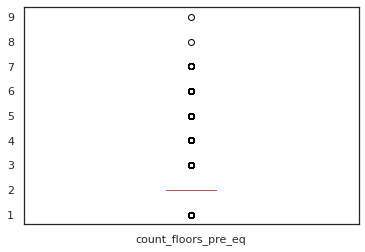

<Figure size 432x288 with 0 Axes>

In [78]:
# Box plot for train
for col in discrete_variables:
  fig = plt.figure()
  train.boxplot(column=col, grid=False)
  plt.show()
  plt.clf()

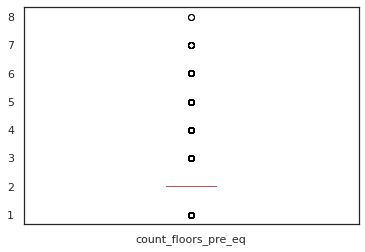

<Figure size 432x288 with 0 Axes>

In [80]:
# Box plot for test
for col in discrete_variables:
  fig = plt.figure()
  test_values.boxplot(column=col, grid=False)
  plt.show()
  plt.clf()

Parece que con los diagramas de caja muestran que existen multitud de outliers, tanto para las variables continuas como para las discretas. En principio, consideramos dejarlas ya que en la literatura de referencia parecen variables de cierta importancia.

# Exploración de variables categóricas

Primero exploraremos las variables categóricas numéricas exceptuando el target.


In [0]:
categorical_num_variables = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other','count_families','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']


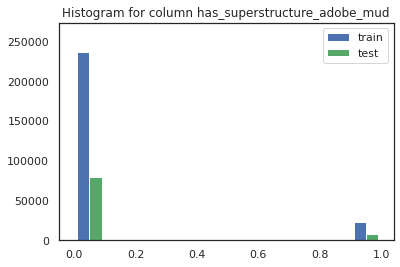

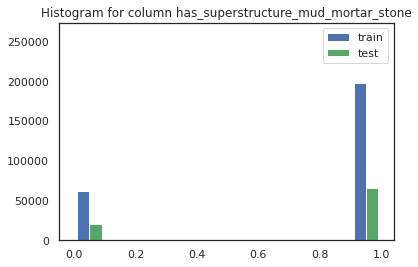

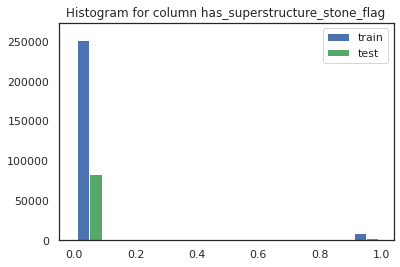

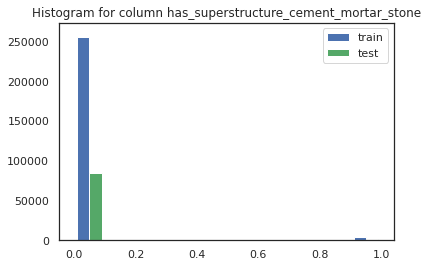

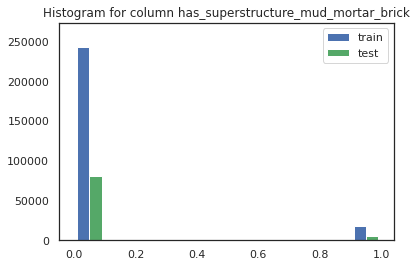

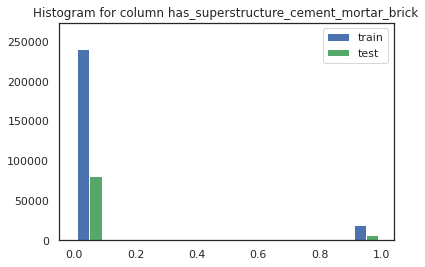

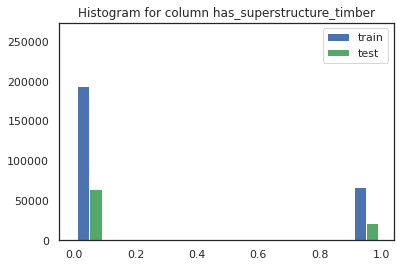

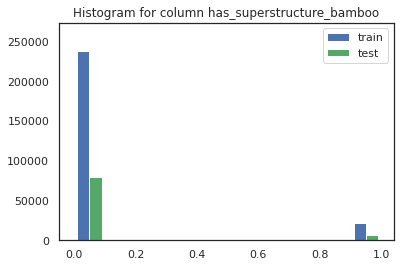

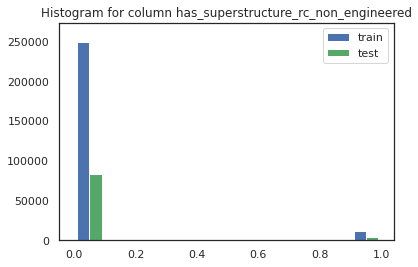

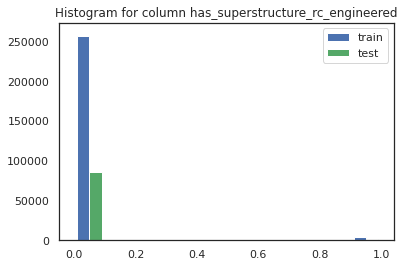

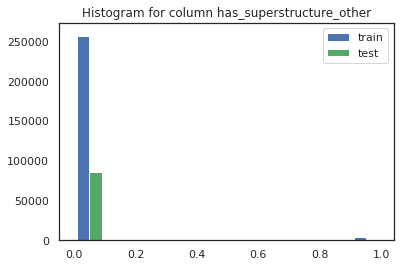

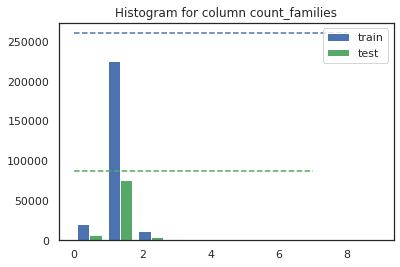

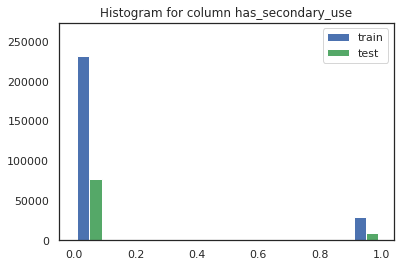

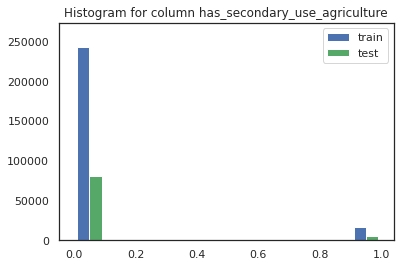

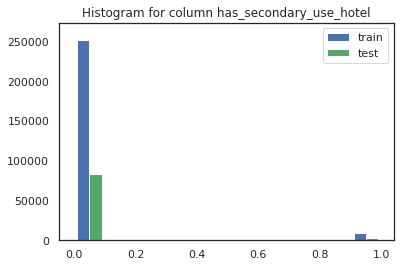

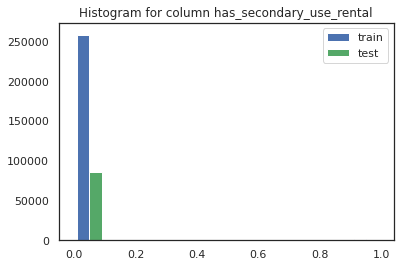

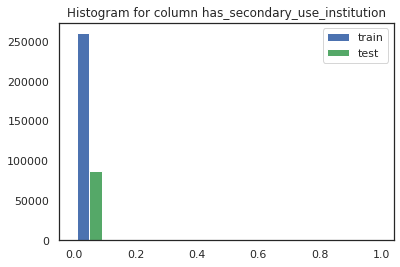

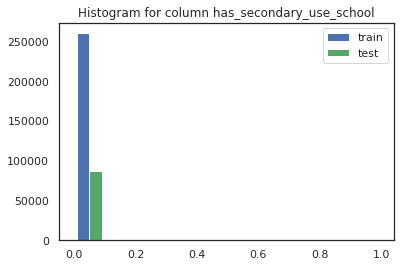

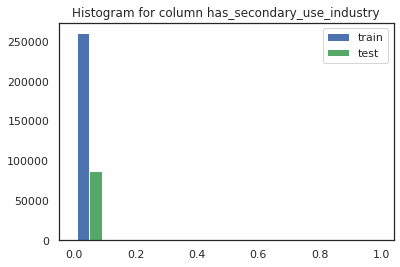

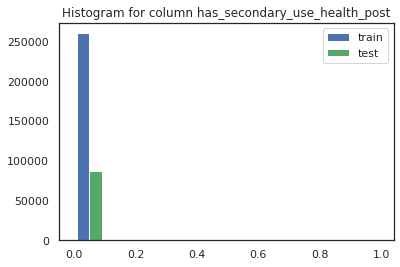

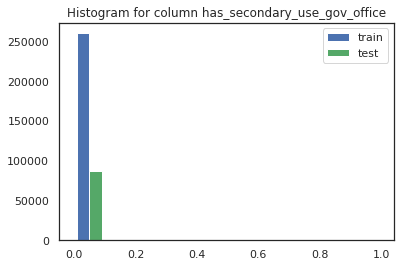

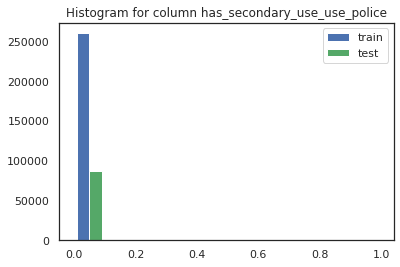

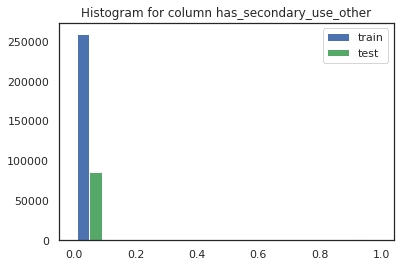

In [91]:
for col in categorical_num_variables:
  range_train = range(np.min(train[col]),np.max(train[col]))
  range_test = range(np.min(test_values[col]),np.max(test_values[col]))
  train_limit = np.array([train.shape[0] for i in range_train])
  test_limit = np.array([test_values.shape[0] for i in range_test])
  x = [train[col], test_values[col]]
  plt.hist(x, label=['train', 'test'])
  plt.plot(range_train, train_limit, 'b--')
  plt.plot(range_test, test_limit, 'g--') 
  plt.title("Histogram for column " + col)
  plt.legend(loc='upper right')
  plt.show()

Ahora vamos con las variables categóricas no numéricas:


Muchas de estas variables sólo tienen muestras para un valor por lo que podríamos considerar eliminarlas del dataset.

In [0]:
categorical_nonum_variables = ['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']

In [0]:
for col in categorical_num_variables:
  range_train = range(np.min(train[col]),np.max(train[col]))
  range_test = range(np.min(test_values[col]),np.max(test_values[col]))
  train_limit = np.array([train.shape[0] for i in range_train])
  test_limit = np.array([test_values.shape[0] for i in range_test])
  x = [train[col], test_values[col]]
  plt.hist(x, label=['train', 'test'])
  plt.plot(range_train, train_limit, 'b--')
  plt.plot(range_test, test_limit, 'g--') 
  plt.title("Histogram for column " + col)
  plt.legend(loc='upper right')
  plt.show()

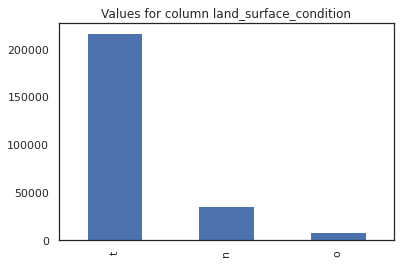

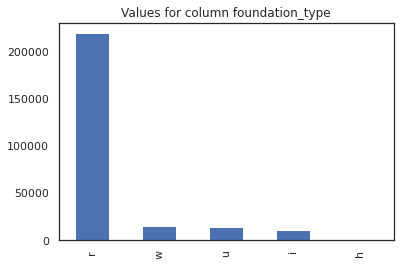

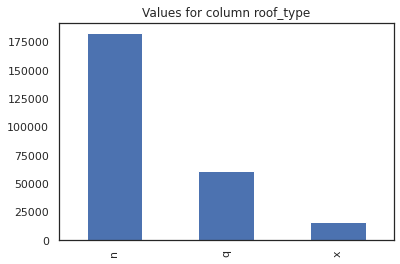

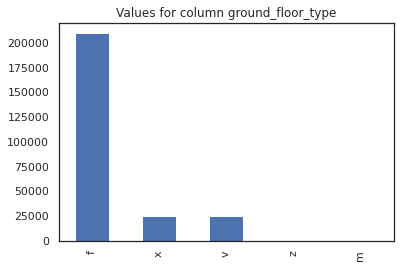

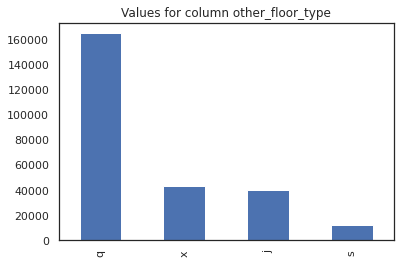

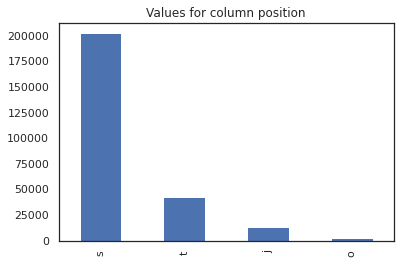

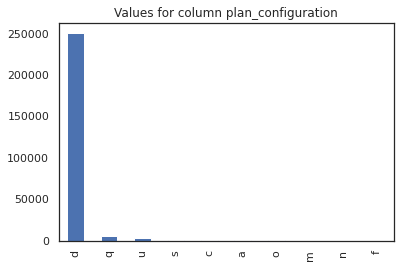

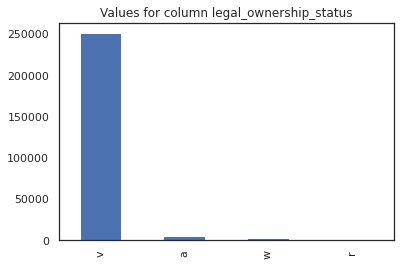

In [131]:
for col in categorical_nonum_variables:
  train[col].value_counts().plot(kind='bar')
  plt.title("Values for column " + col)
  plt.show()

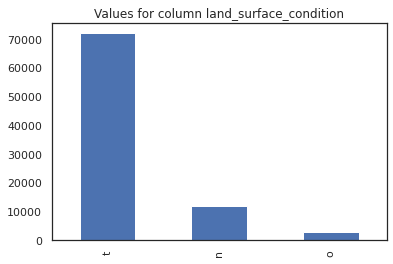

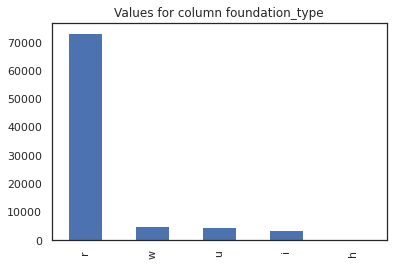

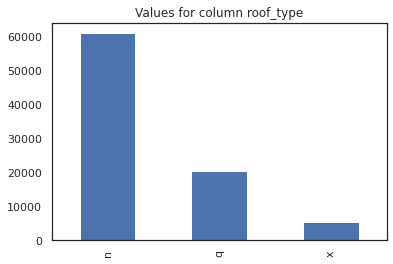

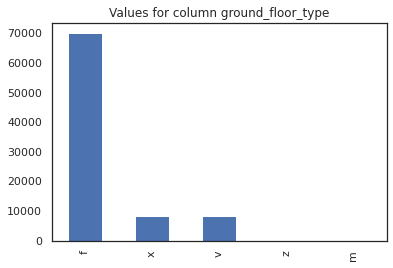

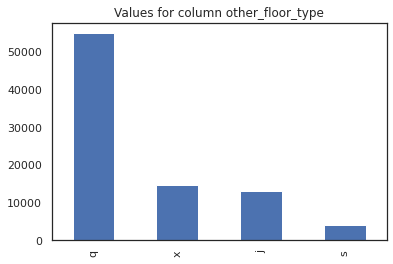

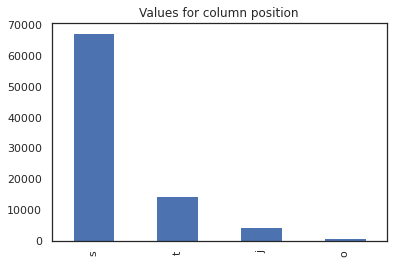

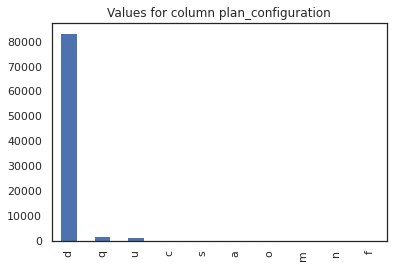

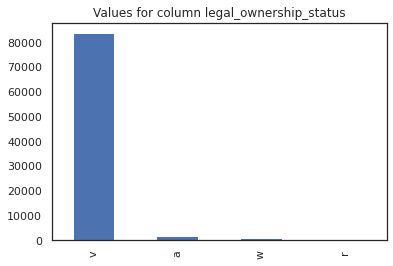

In [132]:
for col in categorical_nonum_variables:
  test_values[col].value_counts().plot(kind='bar')
  plt.title("Values for column " + col)
  plt.show()

## Variable a predecir - grado de daño

In [0]:
target = 'damage_grade'

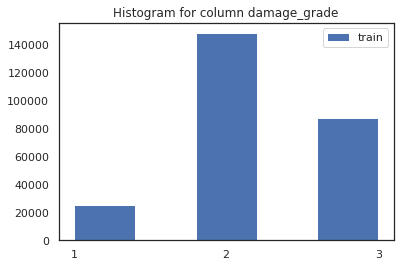

In [104]:
plt.hist(train[target], label=['train'], bins=5)
plt.xticks([1, 2, 3], ('1', '2', '3'))
plt.title("Histogram for column " + target)
plt.legend(loc='upper right')
plt.show()

Podemos ver cómo nuestra variable a predecir no muesrta un balance entre las tres categorías.

# Matriz de correlación entre las variables numéricas

TODO Tiene sentido correlacionarlo con la variable de salida si es ordinal numérica? 

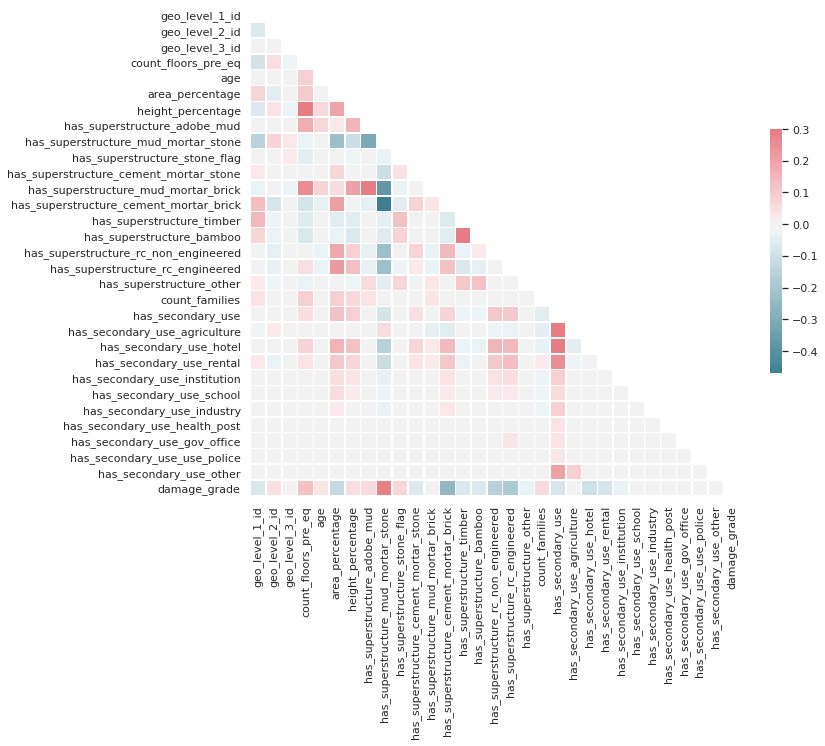

In [20]:
sns.set(style="white")

# Matriz de correlación
correlation_matrix = train.corr()

# Máscara en blanco para el triángulo superior
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generación del mapa de colores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Mapa de calor representando la matriz de correlación con la máscara
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Las variables no parecen correlacionadas entre sí, ya que oscilan entre los valores -0.45 y 0.30.

A continuación, exploraremos las variables categóricas no numéricas.

# Tratamiento de variables categóricas no numéricas

Las siguientes variables van a pasar a ser categóricas numéricas:

* land_surface_condition
* foundation_type       
* roof_type             
* ground_floor_type     
* other_floor_type      
* position              
* plan_configuration    
* legal_ownership_status

In [0]:
train = pd.get_dummies(train)
test = pd.get_dummies(test_values)

In [24]:
train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


# Tratamiento de valores faltantes

In [0]:
total_rows, total_columns = train.shape
train['noNans_pct'] = train.apply(lambda x: x.count()/total_columns*100, axis=1)


In [26]:
train.groupby('noNans_pct').size()

noNans_pct
100.0    260601
dtype: int64

In [0]:
total_rows, total_columns = test.shape
test['noNans_pct'] = test.apply(lambda x: x.count()/total_columns*100, axis=1)


In [112]:
test.groupby('noNans_pct').size()

noNans_pct
100.0    86868
dtype: int64

Vemos que no hay ningun 'missing', por tanto, pasamos a la siguiente sección. En caso, de que hubiera podrían sustituirse por el valor medio de la columna.

# Tratamiento de outliers
[ TODO ]

# Normalización del dataset de entrenamiento y test
[ TODO ]

# Almacenamiento

Almacenamiento de los conjuntos de datos para el entrenamiento

In [0]:
train = train.reset_index()

In [0]:
train.to_csv('train_processed.csv')
test.to_csv('test_processed.csv')